In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [6]:
df = pd.read_csv('datasets/daily-totals-L-station-ridership.csv')
df.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [7]:
df.shape

(1049633, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049633 entries, 0 to 1049632
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   station_id   1049633 non-null  int64 
 1   stationname  1049633 non-null  object
 2   date         1049633 non-null  object
 3   daytype      1049633 non-null  object
 4   rides        1049633 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 40.0+ MB


In [9]:
df.isna().sum()

station_id     0
stationname    0
date           0
daytype        0
rides          0
dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
daytype_dict = {
    'W': 'weekday',
    'A': 'saturday', 
    'U': 'sunday-holiday'
}
df['daytype'] = df['daytype'].map(daytype_dict)

In [12]:
df.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,2017-12-22,weekday,6104
1,41000,Cermak-Chinatown,2017-12-18,weekday,3636
2,40280,Central-Lake,2017-12-02,saturday,1270
3,40140,Dempster-Skokie,2017-12-19,weekday,1759
4,40690,Dempster,2017-12-03,sunday-holiday,499


In [13]:
df.rename(columns={'rides': 'daily_total_riders'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049633 entries, 0 to 1049632
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   station_id          1049633 non-null  int64         
 1   stationname         1049633 non-null  object        
 2   date                1049633 non-null  datetime64[ns]
 3   daytype             1049633 non-null  object        
 4   daily_total_riders  1049633 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 40.0+ MB


In [15]:
df['stationname'].nunique()

148

In [16]:
df['station_id'].nunique()

147

In [17]:
df.groupby('stationname')[['daily_total_riders']].mean()

,daily_total_riders
stationname,
18th,1241.208418
35-Bronzeville-IIT,1728.564350
35th/Archer,2185.998643
43rd,805.128748
47th-Dan Ryan,2522.492844
...,...
Western-Cermak,777.838040
Western-Forest Park,1187.878472
Western-Orange,2813.332157


In [18]:
df.groupby('daytype')[['daily_total_riders']].mean()

,daily_total_riders
daytype,
saturday,2189.037895
sunday-holiday,1591.739272
weekday,3766.467834


In [43]:
df.to_csv('datasets/clean_daily-totals-L-station-ridership.csv', index=False)

In [21]:
mean_by_station = df.groupby('stationname')['daily_total_riders'].agg([np.mean]).sort_values(by='mean', ascending=False)
mean_by_station.index[:20]

Index(['Lake/State', 'Clark/Lake', 'Chicago/State', '95th/Dan Ryan',
       'Belmont-North Main', 'Fullerton', 'Grand/State', 'O'Hare Airport',
       'Jackson/State', 'Roosevelt', 'Washington/Dearborn', 'State/Lake',
       'Monroe/State', 'Addison-North Main', 'Midway Airport',
       'Washington/Wabash', 'Clark/Division', '79th', 'Adams/Wabash',
       'Jackson/Dearborn'],
      dtype='object', name='stationname')

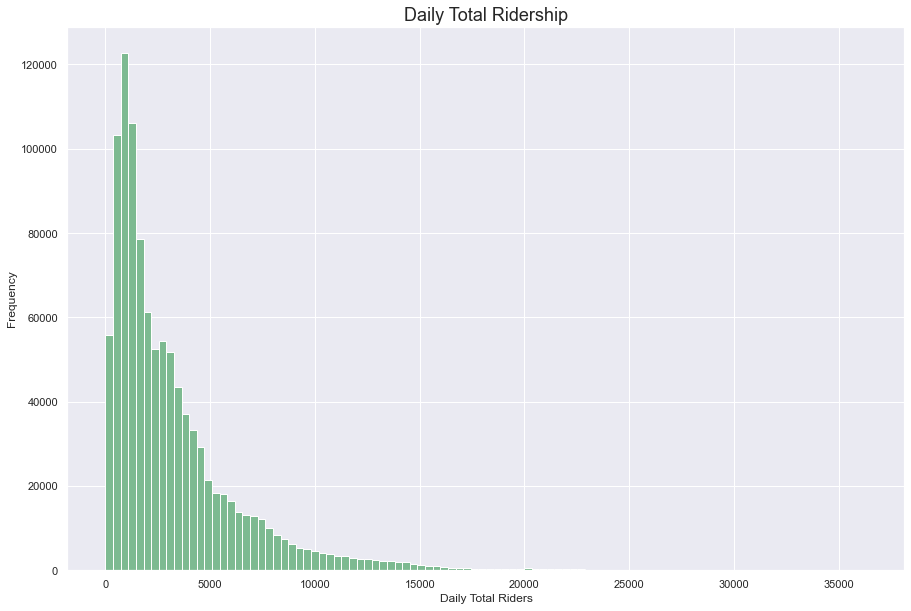

In [22]:
sns.set_theme(palette='crest')
plt.figure(figsize=(15,10))
plt.hist(df['daily_total_riders'], bins=100)
plt.title("Daily Total Ridership", fontsize=18)
plt.ylabel('Frequency')
plt.xlabel('Daily Total Riders');

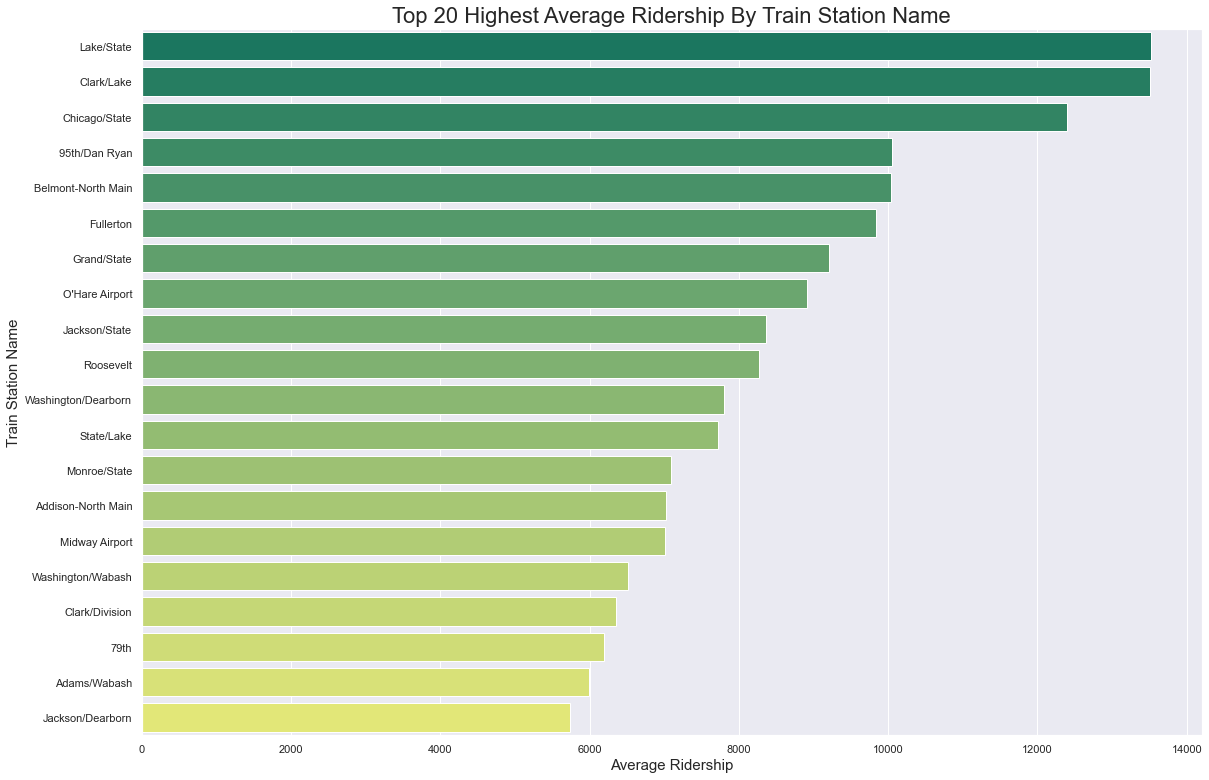

In [40]:
sns.set_theme(palette='crest')
plt.figure(figsize=(19,13))
plt.title('Top 20 Highest Average Ridership By Train Station Name',fontsize=22)
sns.barplot(x=mean_by_station['mean'].head(20), y=mean_by_station.index[:20], palette='summer')
plt.ylabel('Train Station Name', fontsize=15)
plt.xlabel('Average Ridership', fontsize=15)
plt.savefig('data_viz/top_20_highest_avg_ridership_train_station_name.png');

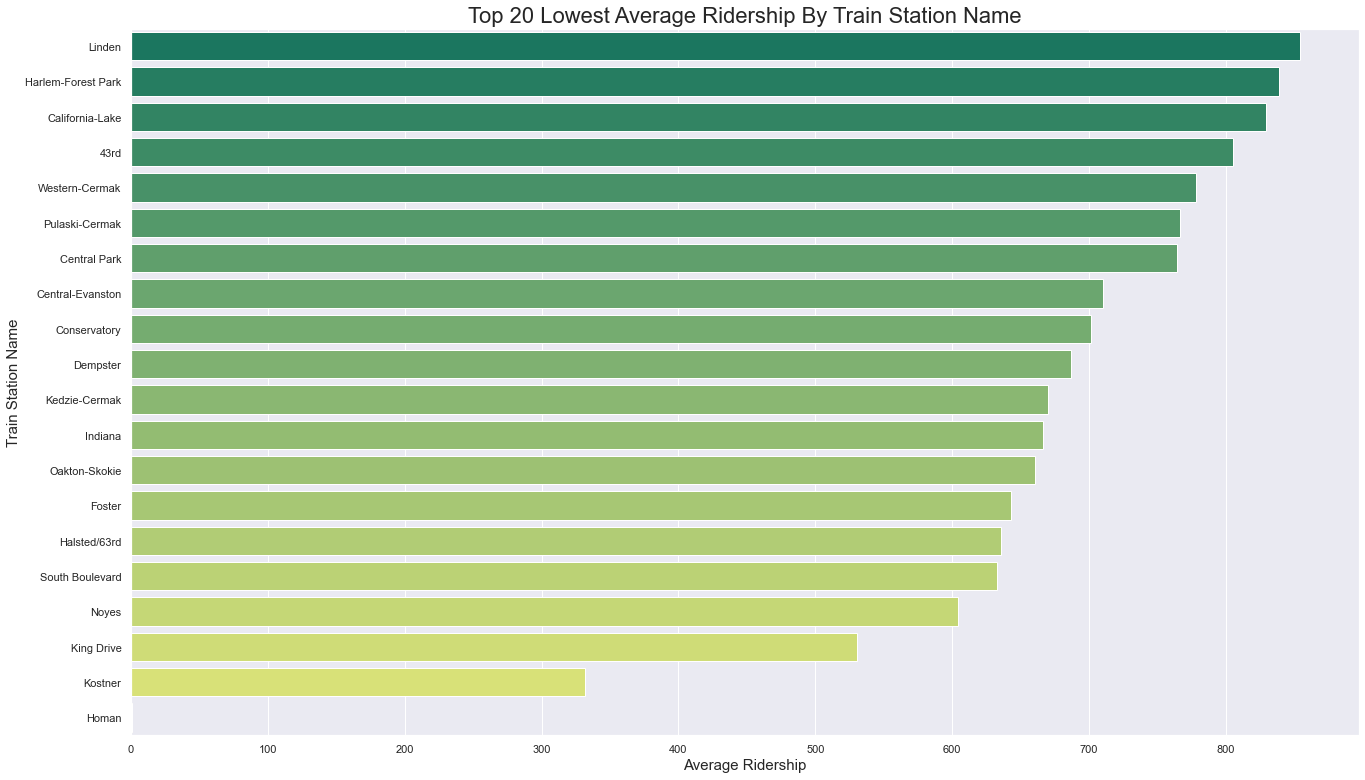

In [42]:
plt.figure(figsize=(22,13))
plt.title('Top 20 Lowest Average Ridership By Train Station Name',fontsize=22)
sns.barplot(x=mean_by_station['mean'].tail(20), y=mean_by_station.index[-20:], palette='summer')
plt.ylabel('Train Station Name', fontsize=15)
plt.xlabel('Average Ridership', fontsize=15)
plt.savefig('data_viz/top_20_lowest_avg_ridership_train_station_name.png');

In [33]:
mean_by_daytype=df.groupby('daytype')['daily_total_riders'].agg([np.mean]).sort_values(by='mean', ascending=False)

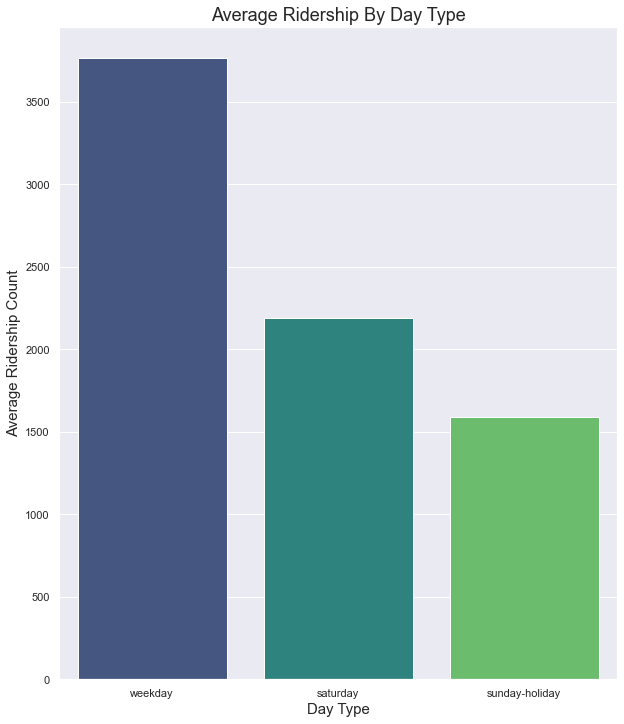

In [34]:
sns.set_theme(palette='crest')
plt.figure(figsize=(10,12))
plt.title('Average Ridership By Day Type',fontsize=18)
sns.barplot(y=mean_by_daytype['mean'], x=mean_by_daytype.index, palette='viridis')
plt.ylabel('Average Ridership Count', fontsize=15)
plt.xlabel('Day Type', fontsize=15)
plt.savefig('data_viz/avg_ridership_by_daytype.png');